# Ejemplo de Arbol de Decisión

Los datos fueron descargados de: https://www.kaggle.com/blastchar/telco-customer-churn

conda install -c conda-forge pydotplus

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

from IPython.display import Image
import pydotplus # Si no lo tienen instalado: conda install -c conda-forge pydotplus


### Importamos los datos

In [2]:
data = pd.read_csv('TelcoChurn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Imputamos los nulos que figuran como "vacios"
data['TotalCharges'] = data['TotalCharges'].replace(' ',-1).astype(float)

### Convertirmos las variables categóricas a Dummies



In [5]:
# Seleccionamos las variables categóricas
cat_vars = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
           'PaymentMethod']

In [6]:
# Iteramos sobre cada variable creando su dummie         
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [7]:
# Descartamos las variables originales
data = data.drop(cat_vars, axis = 1)

In [8]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [9]:
# El target también los convertimos en una variable numérica dummie
data['target'] = np.where(data.Churn == 'Yes',1,0)

In [10]:
# Eliminamos la variable Target y el ID de cliente que no arroja información (realmente no tiene información?)
data = data.drop(['Churn', 'customerID'], axis = 1)

In [11]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,target
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1


Que me criticarian de lo que hice hasta ahora?

### Separamos la base en las columnas Independientes y la Dependiente (X e Y)

In [12]:
X=data.drop(data.columns[-1], axis=1)
y=data.iloc[:,-1]

In [13]:
# Otra forma de hacer lo mismo
X, y = data.drop(data.columns[-1], axis=1), data.iloc[:,-1]

In [14]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: target, dtype: int32

### Separamos en train y test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
print("Tamaño de Base:", data.shape)
print("Tamaño de Muestra de Entrenamiento:", X_train.shape)
print("Tamaño de Muestra de Testeo", X_test.shape)
print("Tamaño del Target de Entrenamiento:", y_train.shape)
print("Tamaño del Target de Testeo", y_test.shape)

Tamaño de Base: (7043, 46)
Tamaño de Muestra de Entrenamiento: (4930, 45)
Tamaño de Muestra de Testeo (2113, 45)
Tamaño del Target de Entrenamiento: (4930,)
Tamaño del Target de Testeo (2113,)


### Ahora si a construir el árbol

In [18]:
dtree = tree.DecisionTreeClassifier(max_depth = 1)

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [20]:
# Nos guardamos la predicción que hizo el modelo
y_pred = dtree.predict(X_test)

In [21]:
# Calculo el Accuracy
accuracy = metrics.accuracy_score(np.asarray(y_test), y_pred)
print('el accuracy es {0}'.format(accuracy))

el accuracy es 0.7283483199242783


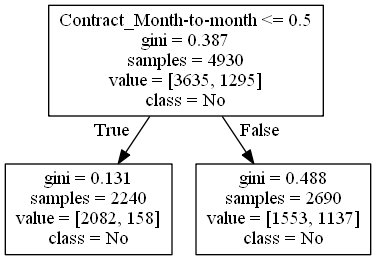

In [22]:
# Graficamos el Arbol para entenderlo
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names= X.columns,
                                 class_names= ['No','Si'])

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())